In [1]:
using Plots
using StatsBase
using Base.Threads

# Lucas Schmidt Ferreira de Araujo

In [4]:
function NagelSchrekenberg(nt::Int, nx::Int, ρ::Float64, p::Float64)
    domain = zeros(Int, nt, nx) 
    ncars = round(Int, ρ * nx)  
    velocities = zeros(Int, nt, ncars)  

    car_positions = sample(1:nx, ncars, replace=false)
    domain[1, car_positions] .= 1:ncars
    velocities[1, :] .= rand(0:5, ncars)

    for t in 1:nt-1
        for car in 1:ncars
            pos = findfirst(x -> x == car, domain[t, :])
            vel = velocities[t, car]

            vel = min(vel + 1, 5)
            Δx = 1
            while( domain[t, mod1(pos + Δx, nx)] == 0)
                Δx += 1
            end
            vel = min(vel, Δx - 1)
            if( vel > 0 && rand() < p)
                vel -= 1
            end
            new_pos = mod1(pos + vel, nx)
            
            domain[t+1, new_pos] = car
            velocities[t+1, car] = vel
        end
    end
    return domain, velocities
end

function average_vel(nt::Int , nx::Int , ρ::Float64 , p::Float64 , nsim::Int=1000)
    av_vel = Atomic{Float64}(0.0)
    @Threads.threads for q in 1:nsim
        dom , vel = NagelSchrekenberg(nt,nx,ρ,p)
        avg = mean( vel[end,:] ) / nsim
        atomic_add!(av_vel,avg)
    end
    return av_vel[]
end

average_vel (generic function with 2 methods)

In [10]:
nt = 100
nx = 500
p = .3
ρ1 = .1
ρ2 = .2
ρ3 = .6
ρ4 = .8

domain1 , velocities1 = NagelSchrekenberg(nt,nx,ρ1,p)
domain2 , velocities2 = NagelSchrekenberg(nt,nx,ρ2,p)
domain3 , velocities3 = NagelSchrekenberg(nt,nx,ρ3,p)
domain4 , velocities4 = NagelSchrekenberg(nt,nx,ρ4,p);

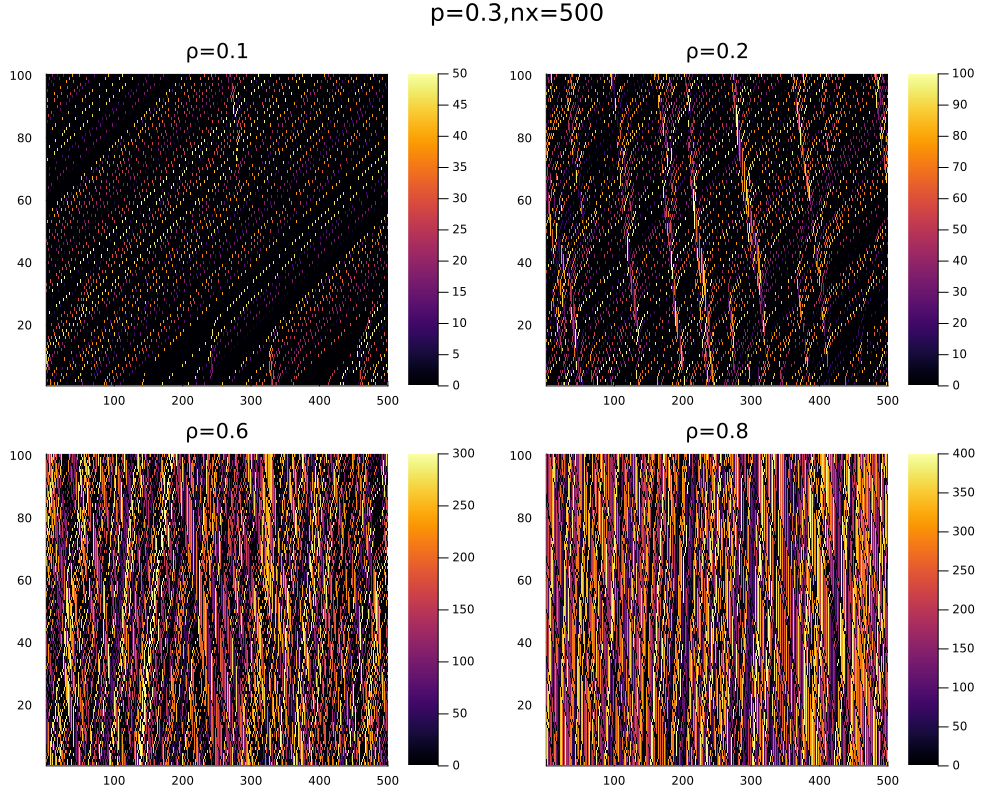

In [11]:
p1 = heatmap(domain1,title="ρ=$(ρ1)")
p2 = heatmap(domain2,title="ρ=$(ρ2)")
p3 = heatmap(domain3,title="ρ=$(ρ3)")
p4 = heatmap(domain4,title="ρ=$(ρ4)")

plot(p1,p2,p3,p4,size=(1000,800), suptitle = "p=$(p),nx=$(nx)")

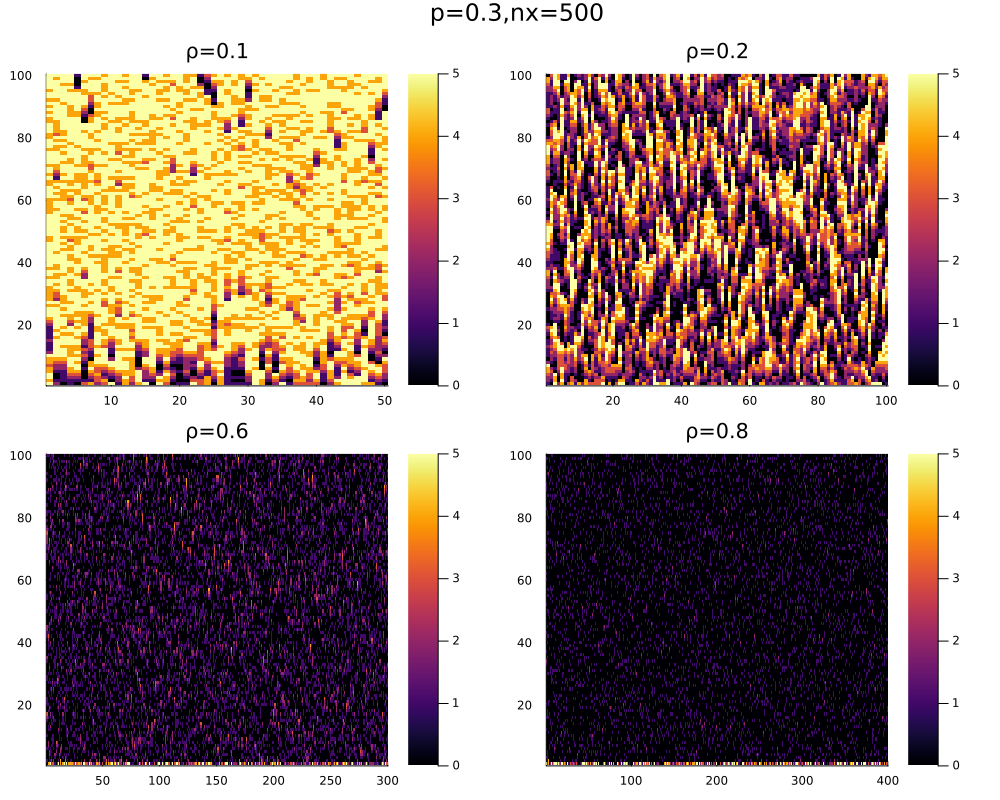

In [12]:
p1 = heatmap(velocities1,title="ρ=$(ρ1)")
p2 = heatmap(velocities2,title="ρ=$(ρ2)")
p3 = heatmap(velocities3,title="ρ=$(ρ3)")
p4 = heatmap(velocities4,title="ρ=$(ρ4)")

plot(p1,p2,p3,p4,size=(1000,800), suptitle = "p=$(p),nx=$(nx)")

In [8]:
nt = 100
nx = 200

Ρ = range(0.001,1,100)
p1 = .0
p2 = .25
p3 = .50
p4 = .75

S1 = average_vel.(nt, nx, Ρ , p1)
S2 = average_vel.(nt, nx, Ρ , p2)
S3 = average_vel.(nt, nx, Ρ , p3)
S4 = average_vel.(nt, nx, Ρ , p4);

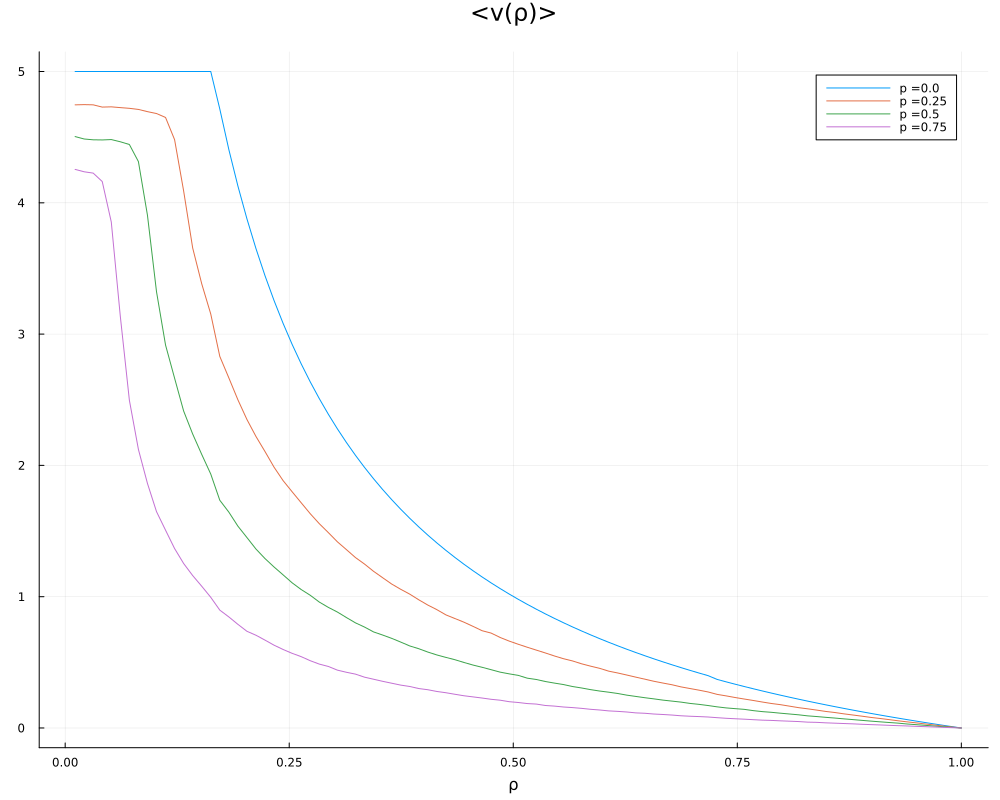

In [9]:
plot( Ρ , S1 , size = (1000,800) , label =  "p =$(p1)" , xlabel = "ρ" , suptitle ="<v(ρ)>")
plot!( Ρ , S2 , label = "p =$(p2)")
plot!( Ρ , S3 , label = "p =$(p3)")
plot!( Ρ , S4 , label = "p =$(p4)")